# Imports

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import glob

# Paths

In [2]:
path = 'Data/'

# Importing Data

In [8]:
all_files = glob.glob(path + "/*.csv")

main_df = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    main_df.append(df)

main_df[1]

,LT,serial-number,Value
0,RBP,118,527
1,BP,118,528
2,BU,118,530
3,CP,118,529
4,GP,118,532
5,AP,118,538
6,ROP,118,545
7,DRP,118,547
8,FRP,118,554
9,WPC,118,533


# Creating Plotter Functions

In [16]:
def CreateLinePlotHelperFunc(df):
    fig, ax = plt.subplots()

    legend = []
    for vals in df:
        vals['Value'].plot(ax=ax, figsize=(15,10))
        sentence = 'Serial: ' + str(vals['serial-number'][0])
        legend.append(sentence)

    t_ticks = []
    for select_index in range(len(df[0].index)):
        t_ticks.append(int(df[0].index[select_index]))
    ax.xaxis.set_ticks([tick for tick in t_ticks])

    t_labels = []
    for LTNames in df[0]['LT']:
        t_labels.append(LTNames)
    ax.set_xticklabels([label for label in t_labels])
    plt.xticks(rotation=65)

    ax.legend(legend, ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.25))
    
    plt.xlabel("LT")
    plt.ylabel("Val")

    plt.show()
    
def createScatterHelperFunc(df):
    plt.figure(figsize=(15, 10))
    legend = []
    for vals in df:
        ind = np.arange(len(vals.index.values))
        plt.scatter(x = ind, y = vals['Value'])
        legend.append(str(vals['serial-number'][0]))
    plt.legend(legend)
    plt.xticks(ind,df[0]['LT'],rotation=65)
    
    plt.xlabel("LT")
    plt.ylabel("Val")
    plt.show()

# Plotting raw data

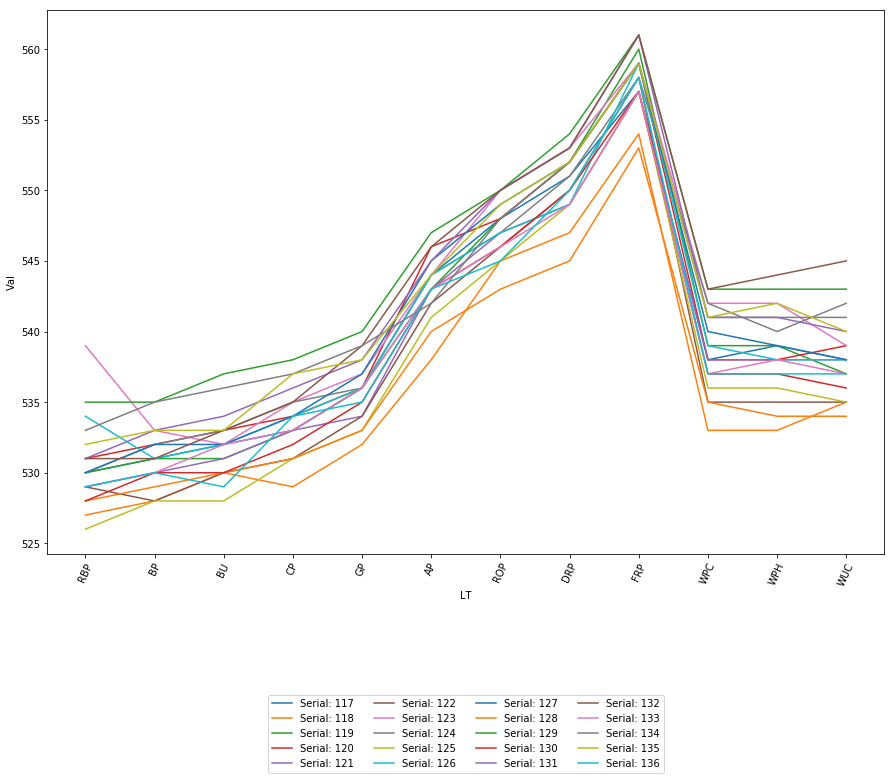

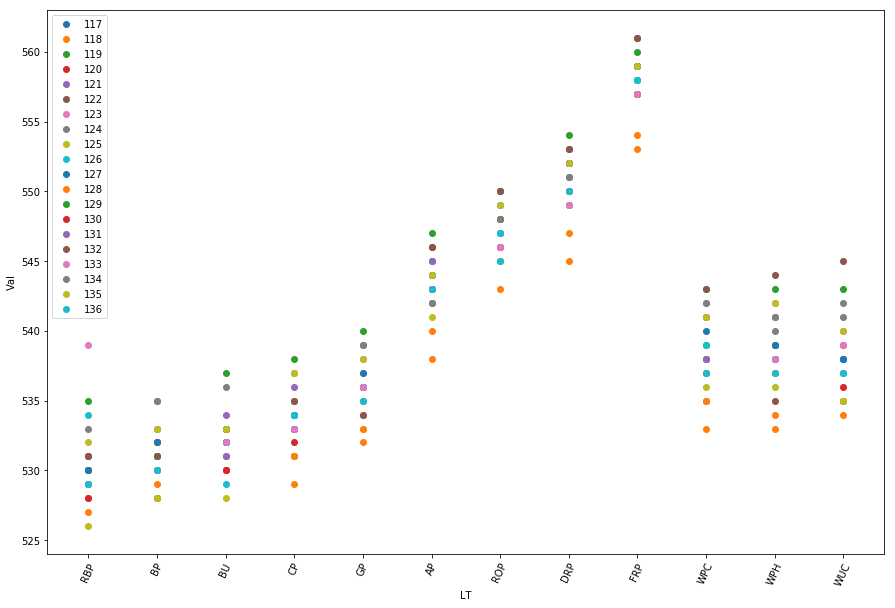

In [17]:
CreateLinePlotHelperFunc(main_df)
createScatterHelperFunc(main_df)

# Calculating mean

,LT,serial-number,Value
0,RBP,mean,531.0
1,BP,mean,531.0
2,BU,mean,532.0
3,CP,mean,534.0
4,GP,mean,536.0
5,AP,mean,543.0
6,ROP,mean,547.0
7,DRP,mean,551.0
8,FRP,mean,558.0
9,WPC,mean,539.0


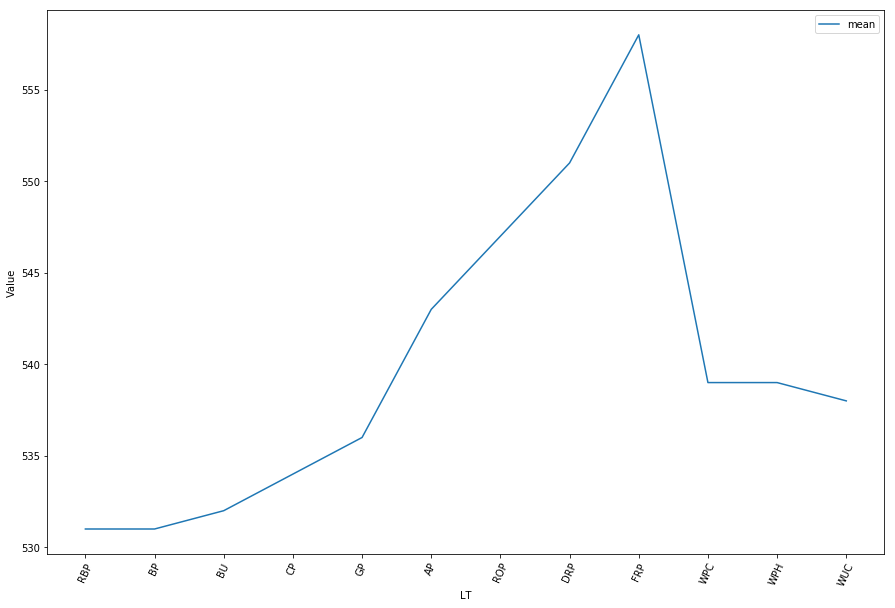

In [19]:
mean_df = main_df[0].copy()
mean_df['Value'] = 0.0
mean_df['serial-number'] = 'mean'
for i in main_df:
    mean_df['Value'] = mean_df['Value'] + i['Value']
mean_df['Value'] = mean_df['Value'] / (len(main_df))
mean_df['Value'] = mean_df['Value'].astype(float).round()
display(mean_df)

fig, ax = plt.subplots()

mean_df['Value'].plot(ax=ax, figsize=(15,10))

t_ticks = []
for select_index in mean_df.index:
    t_ticks.append(int(select_index))
ax.xaxis.set_ticks([tick for tick in t_ticks])
#[0,1,2,3,4,5,6,7,8,9, 10,11]

t_labels = []
for LTNames in mean_df['LT']:
    t_labels.append(LTNames)
ax.set_xticklabels([label for label in t_labels])
plt.xticks(rotation=65)

plt.xlabel("LT")
plt.ylabel("Value")
ax.legend(['mean'])

plt.show()

# Normalization

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('Serial-Number: ', 123, ' - ERROR: outlier detected')


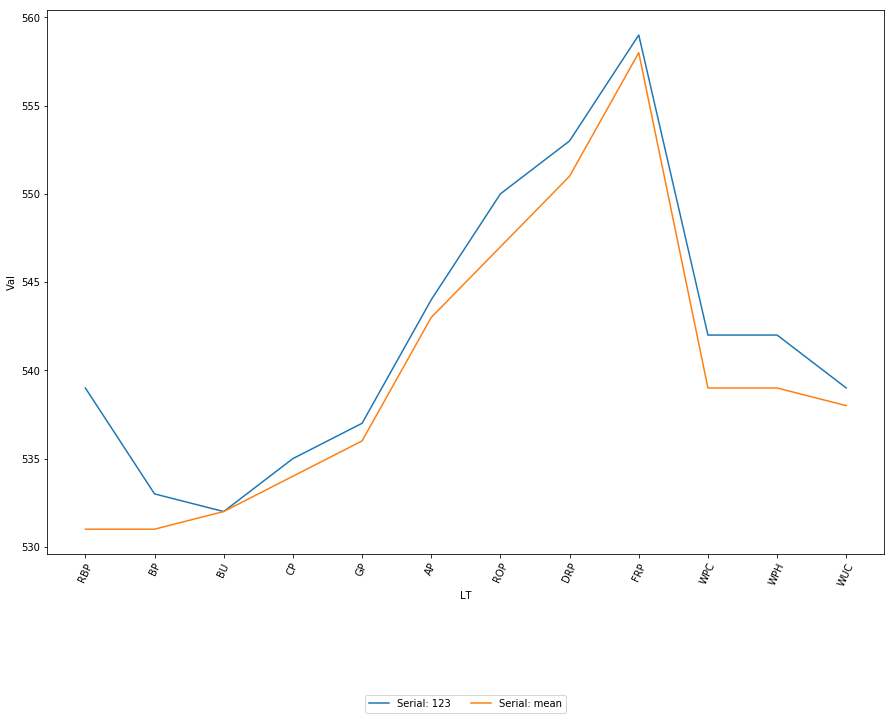

In [34]:
# Currently allowed variation from meanline is +- 5 values
Allowed_Variation = 5

# Currently allowed average delta between line and meanline is +- 5 values
Allowed_Avg_Delta = 5

# Making copies to not effect original data
df_copy = []
for original in main_df:
    i = original.copy()
    df_mean = mean_df.copy()
    df_mean['Value'] = df_mean['Value'] - i['Value']
    mean = df_mean['Value'].mean()
    
    # if average delta between line and meanline is too big:
    if abs(mean) >= Allowed_Avg_Delta:
        print('Serial-Number: ', original['serial-number'][0], ' - ERROR: high delta: ', mean)
        CreateLinePlotHelperFunc([original, mean_df])
        CreateLinePlotHelperFunc([original, mean_df])
    i['Value'] = i['Value'] + mean
    
    outlierpresent = False
    for index, row in i.iterrows():
        if int(row['Value']) in range(int(mean_df['Value'][index] - Allowed_Variation), int(mean_df['Value'][index] + Allowed_Variation)):
            # setting with copy warning, checked, is ok but too lazy to find the better way
            i['Value'][index] = mean_df['Value'][index]
        else:
            outlierpresent = True
    if outlierpresent:
        print('Serial-Number: ', original['serial-number'][0], ' - ERROR: outlier detected')
        CreateLinePlotHelperFunc([original, mean_df])
    df_copy.append(i)

# Plotting normalized data

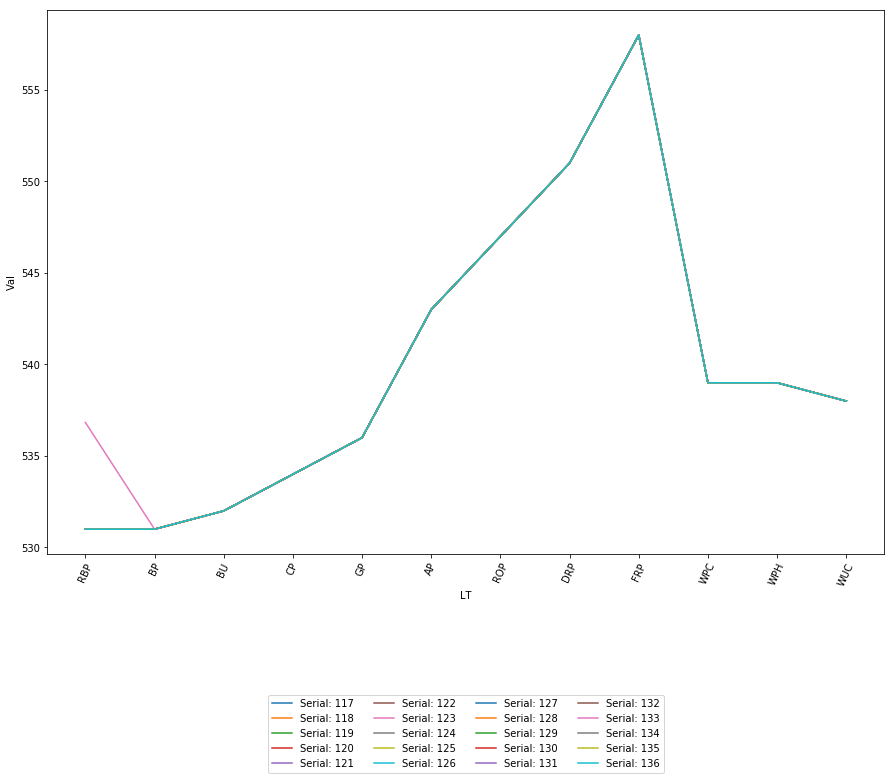

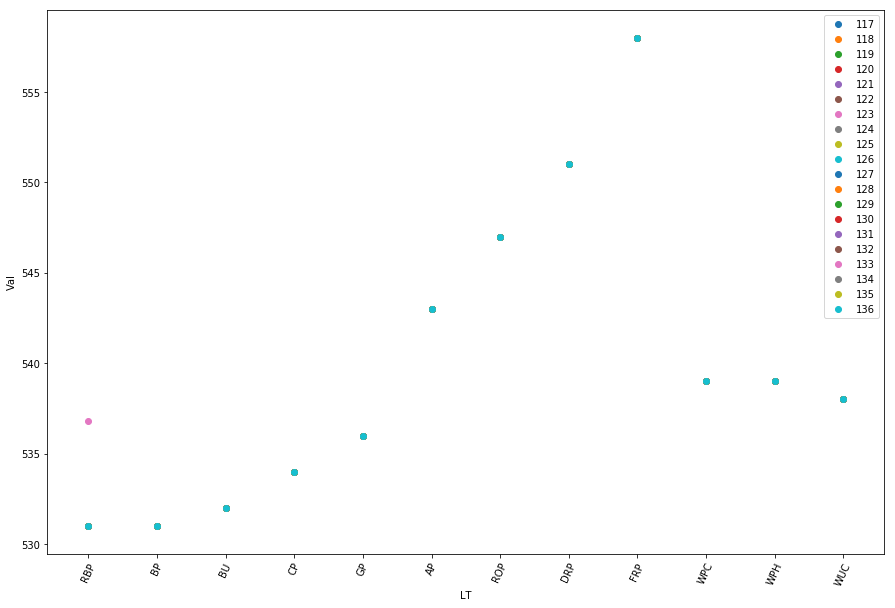

In [33]:
CreateLinePlotHelperFunc(df_copy)

createScatterHelperFunc(df_copy)